***Installing libraries***


In [ ]:
!pip install os
!pip install --upgrade librosa
!pip install ipywidgets

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.8 MB/s eta 0:00:00


***Importing Libraries***

In [ ]:
import pandas as pd
import numpy as np
import os, glob,pickle
import librosa
import soundfile
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from IPython.display import Audio
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

*** Importing
Dataset Path***

In [ ]:
Root = '/content/drive/MyDrive/SER DATA/Ravdess/audio_speech_actors_01-24/Actor_01/'

In [ ]:
file_emotion = ['happy', 'sad', 'angry', 'neutral','suprised','calm','fear','disgust']
file_path = '/content/drive/MyDrive/SER DATA/Ravdess/audio_speech_actors_01-24'
file_path = os.listdir(file_path)

In [ ]:
type(file_path)

list

***Ravdess Dataset***

In [ ]:
arr = []
for i in file_path:
  actor_path = os.listdir("/content/drive/MyDrive/SER DATA/Ravdess/audio_speech_actors_01-24/"+i)

  for j in actor_path:
    part = j.split('.')[0]
    part = part.split('-')
    # print(part)

    temp =int(part[6])
    # print(temp)
    if part[2] == '01':
        emotion ="neutral"
    elif part[2] == '02':
        emotion ="calm"
    elif part[2] == '03':
        emotion ="happy"
    elif part[2] == '04':
        emotion ="sad"
    elif part[2] == '05':
        emotion ="angry"
    elif part[2] == '06':
        emotion ="fearful"
    elif part[2] == '07':
        emotion ="disgust"
    elif part[2] == '08':
        emotion ="suprised"
    else:
        file_emotion.append('Unknown')

    path = ('/content/drive/MyDrive/SER DATA/Ravdess/audio_speech_actors_01-24/'+i+'/'+j)
    arr.append([emotion, path])


***Data Frame***

In [ ]:
Ravdess_df = pd.DataFrame(arr, columns=['emotion','path'])
# Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

In [ ]:
Ravdess_df

emotion                                               path
0         calm  /content/drive/MyDrive/SER DATA/Ravdess/audio_...
1          sad  /content/drive/MyDrive/SER DATA/Ravdess/audio_...
2      neutral  /content/drive/MyDrive/SER DATA/Ravdess/audio_...
3        angry  /content/drive/MyDrive/SER DATA/Ravdess/audio_...
4     suprised  /content/drive/MyDrive/SER DATA/Ravdess/audio_...
...        ...                                                ...
1435   fearful  /content/drive/MyDrive/SER DATA/Ravdess/audio_...
1436       sad  /content/drive/MyDrive/SER DATA/Ravdess/audio_...
1437   disgust  /content/drive/MyDrive/SER DATA/Ravdess/audio_...
1438   disgust  /content/drive/MyDrive/SER DATA/Ravdess/audio_...
1439   fearful  /content/drive/MyDrive/SER DATA/Ravdess/audio_...

[1440 rows x 2 columns]

In [ ]:
Ravdess_df.head()
print(Ravdess_df.emotion.value_counts())

emotion
calm        192
sad         192
angry       192
suprised    192
fearful     192
disgust     192
happy       192
neutral      96
Name: count, dtype: int64


***Creating CSV File***

In [ ]:
Ravdess_df.to_csv('Ravdess_df.csv',index = False)

***Exploratory Data Analysis***

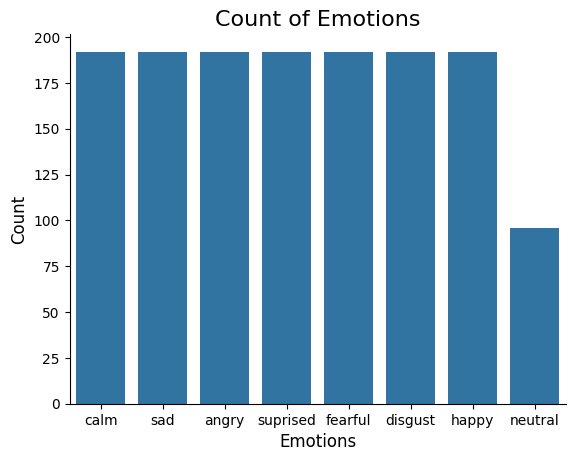

In [ ]:
# Exploratory Data Analysis
plt.title('Count of Emotions', size=16)
sns.countplot(data=Ravdess_df, x='emotion', order=Ravdess_df['emotion'].value_counts().index)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
ex_path =np.array(Ravdess_df.path[Ravdess_df.emotion=='angry'])[11]

In [ ]:
Audio(ex_path)

***Ploting Mel Spectrogram***

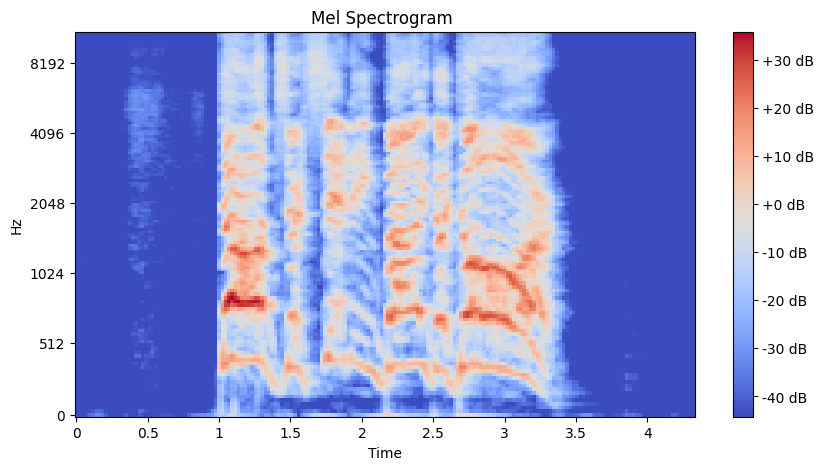

In [ ]:
data,sr = librosa.load(ex_path)
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

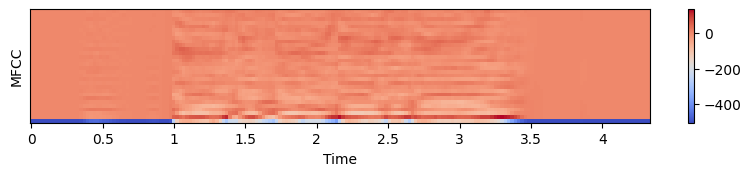

In [ ]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)
plt.figure(figsize=(10, 5))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

***Data Augmentation***

In [ ]:
# Data Augmentation (a technique used to expanding a dataset )
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
# PITCH
def pitch(data, sampling_rate, n_steps = 3):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=n_steps)

In [ ]:
# # NORMAL AUDIO
# import librosa.display
# plt.figure(figsize=(12, 5))
# librosa.display.waveshow(y=data, sr=sr)
# # IPython.display.Audio(data,rate=sr)
# Audio(data,rate=sr)

In [ ]:
# # AUDIO WITH PITCH
# x = pitch(data, sr)
# plt.figure(figsize=(12, 5))
# librosa.display.waveshow(y=x, r=sr)
# ipd.Audio(x, rate=sr)


In [ ]:
# print(type(ex_path[ex_path == emotion].index[0]))

***Ploting wave plot for audio and checking the audio files***

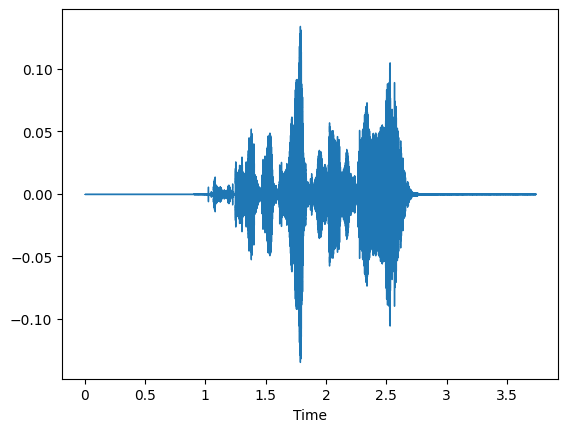

In [ ]:
emotion = 'neutral'
ex_path =np.array(Ravdess_df.path[Ravdess_df.emotion=='angry'])[0]
data, sampling_rate = librosa.load(ex_path)
librosa.display.waveshow(data, sr=sampling_rate)
Audio(ex_path)

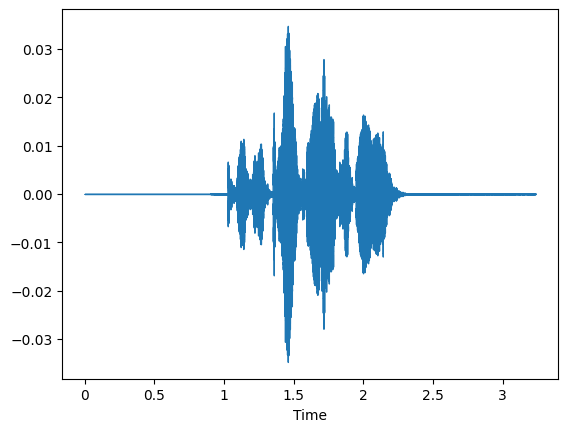

In [ ]:
emotion = 'calm'
ex_path =np.array(Ravdess_df.path[Ravdess_df.emotion=='angry'])[1]
data, sampling_rate = librosa.load(ex_path)
librosa.display.waveshow(data, sr=sampling_rate)
Audio(ex_path)

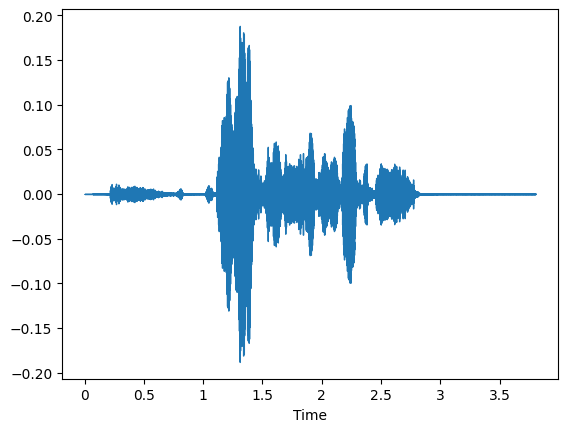

In [ ]:
emotion = 'happy'
ex_path =np.array(Ravdess_df.path[Ravdess_df.emotion=='angry'])[2]
data, sampling_rate = librosa.load(ex_path)
librosa.display.waveshow(data, sr=sampling_rate)
Audio(ex_path)

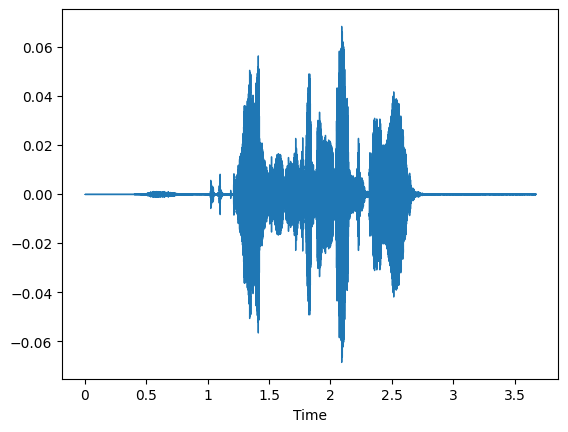

In [ ]:
emotion = 'sad'
ex_path =np.array(Ravdess_df.path[Ravdess_df.emotion=='angry'])[3]
data, sampling_rate = librosa.load(ex_path)
librosa.display.waveshow(data, sr=sampling_rate)
Audio(ex_path)

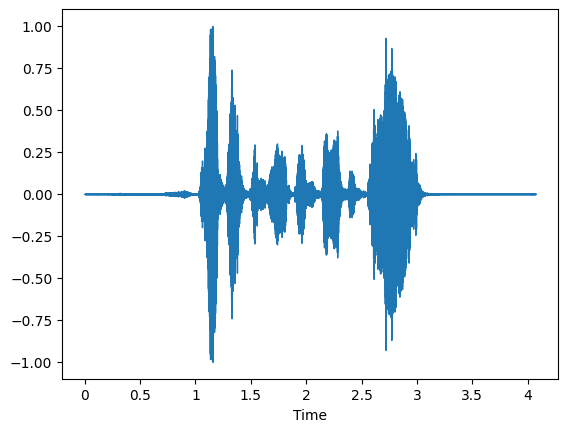

In [ ]:
emotion = 'angry'
ex_path =np.array(Ravdess_df.path[Ravdess_df.emotion=='angry'])[4]
data, sampling_rate = librosa.load(ex_path)
librosa.display.waveshow(data, sr=sampling_rate)
Audio(ex_path)

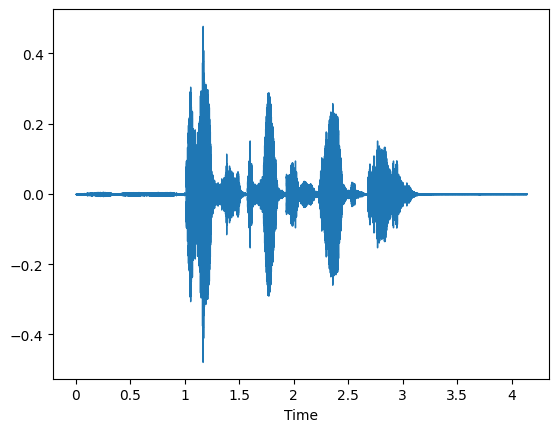

In [ ]:
emotion = 'fearful'
ex_path =np.array(Ravdess_df.path[Ravdess_df.emotion=='angry'])[5]
data, sampling_rate = librosa.load(ex_path)
librosa.display.waveshow(data, sr=sampling_rate)
Audio(ex_path)

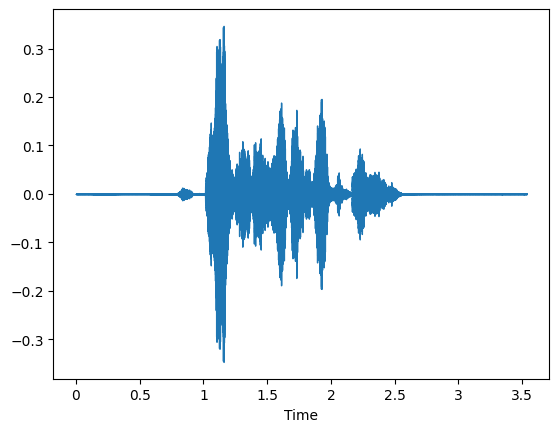

In [ ]:
emotion = 'disgust'
ex_path =np.array(Ravdess_df.path[Ravdess_df.emotion=='angry'])[6]
data, sampling_rate = librosa.load(ex_path)
librosa.display.waveshow(data, sr=sampling_rate)
Audio(ex_path)

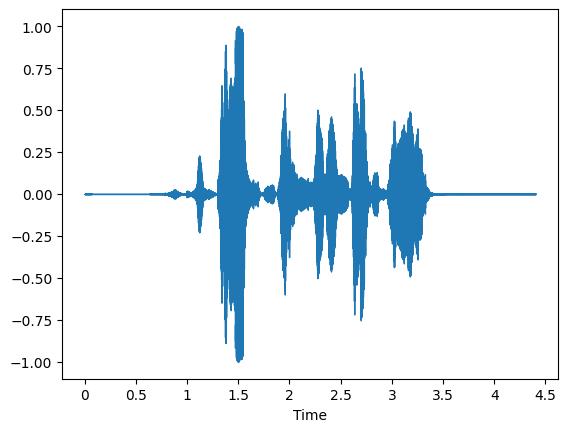

In [ ]:
emotion = 'suprised'
ex_path =np.array(Ravdess_df.path[Ravdess_df.emotion=='angry'])[7]
data, sampling_rate = librosa.load(ex_path)
librosa.display.waveshow(data, sr=sampling_rate)
Audio(ex_path)

***Feature Extraction***

In [ ]:
#Feature Extraction
def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration=3, offset=0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=80).T, axis=0)
  return mfcc

In [ ]:
# print(extract_mfcc(ex_path))

In [ ]:
Ravdess_df.shape

(1440, 2)

In [ ]:
def get_features(path,duration=2.5,offset=0.6):
  data, sampling_rate = librosa.load(path, duration= duration, offset= offset)
  res1 = extract_mfcc(path)
  result = np.array(res1)

  noice_data= noise(data)
  res2 = extract_mfcc(path)
  result = np.vstack((result, res2))


  pitched_data = pitch(data, sampling_rate)
  res3 = extract_mfcc(path)
  result = np.vstack((result,res3))


  # new_data = pitch(data, sampling_rate ,random= True)
  # data_noise_pitch = noise(new_data, random=True)
  # res4 = extract_mfcc(path)
  # result = np.vstack((result,res4))


  return result

In [ ]:
X, Y= [],[]
print(" feature Process.....")
for path, emotion, ind in zip(Ravdess_df.path,Ravdess_df.emotion, range(Ravdess_df.path.shape[0])):
  mfcc = get_features(path)
  if ind % 10 ==0:
    print(f"{ind} samples has been processed")
  for ele in mfcc:
    X.append(ele)
    Y.append(emotion)

print("successful")


 feature Process.....
0 samples has been processed
10 samples has been processed
20 samples has been processed
30 samples has been processed
40 samples has been processed
50 samples has been processed
60 samples has been processed
70 samples has been processed
80 samples has been processed
90 samples has been processed
100 samples has been processed
110 samples has been processed
120 samples has been processed
130 samples has been processed
140 samples has been processed
150 samples has been processed
160 samples has been processed
170 samples has been processed
180 samples has been processed
190 samples has been processed
200 samples has been processed
210 samples has been processed
220 samples has been processed
230 samples has been processed
240 samples has been processed
250 samples has been processed
260 samples has been processed
270 samples has been processed
280 samples has been processed
290 samples has been processed
300 samples has been processed
310 samples has been process

***mfcc Feature CSV file***

In [ ]:
df= pd.DataFrame(X)
df['emotion']=Y
df.head()

0          1          2          3         4          5  \
0 -765.152222  53.784760  -3.636474  13.259921 -2.454765  -7.200421   
1 -765.152222  53.784760  -3.636474  13.259921 -2.454765  -7.200421   
2 -765.152222  53.784760  -3.636474  13.259921 -2.454765  -7.200421   
3 -638.079773  52.854485 -13.919909  10.427796 -3.200083 -18.538958   
4 -638.079773  52.854485 -13.919909  10.427796 -3.200083 -18.538958   

           6          7          8         9  ...       71        72  \
0 -10.476261 -12.178839  -5.830622 -6.997889  ...  2.48769  0.944037   
1 -10.476261 -12.178839  -5.830622 -6.997889  ...  2.48769  0.944037   
2 -10.476261 -12.178839  -5.830622 -6.997889  ...  2.48769  0.944037   
3 -13.826604 -20.444130 -14.787683 -4.246701  ...  1.09478 -0.552850   
4 -13.826604 -20.444130 -14.787683 -4.246701  ...  1.09478 -0.552850   

         73        74        75        76        77        78        79  \
0  1.753111 -0.169268  0.275114 -0.130725  0.737074  0.090127  1.672097   
1  1.753111 -0.169268  0.275114 -0.130725  0.737074  0.090127  1.672097   
2  1.753111 -0.169268  0.275114 -0.130725  0.737074  0.090127  1.672097   
3  0.153159  0.516712  0.114088 -0.396131  0.957537 -0.796750  0.521177   
4  0.153159  0.516712  0.114088 -0.396131  0.957537 -0.796750  0.521177   

   emotion  
0     calm  
1     calm  
2     calm  
3      sad  
4      sad  

[5 rows x 81 columns]

In [ ]:
df.to_csv('mfcc_feature.csv', index= False)

In [ ]:
mfcc_feature = pd.read_csv('mfcc_feature.csv')

In [ ]:
print(mfcc_feature)

              0          1          2          3          4          5  \
0    -765.15220  53.784760  -3.636474  13.259921  -2.454765  -7.200421   
1    -765.15220  53.784760  -3.636474  13.259921  -2.454765  -7.200421   
2    -765.15220  53.784760  -3.636474  13.259921  -2.454765  -7.200421   
3    -638.07980  52.854485 -13.919909  10.427796  -3.200083 -18.538958   
4    -638.07980  52.854485 -13.919909  10.427796  -3.200083 -18.538958   
...         ...        ...        ...        ...        ...        ...   
4315 -575.02545  62.749332 -18.830980   6.500079 -10.621148  -7.023305   
4316 -575.02545  62.749332 -18.830980   6.500079 -10.621148  -7.023305   
4317 -460.40344  21.679943 -36.107857  -0.953596 -16.691568 -16.773705   
4318 -460.40344  21.679943 -36.107857  -0.953596 -16.691568 -16.773705   
4319 -460.40344  21.679943 -36.107857  -0.953596 -16.691568 -16.773705   

              6          7          8         9  ...        71        72  \
0    -10.476261 -12.178839  -5.8306

In [ ]:
X = mfcc_feature.iloc[:, :-1].values

In [ ]:
X.shape

(4320, 80)

In [ ]:
X

array([[-7.65152200e+02,  5.37847600e+01, -3.63647370e+00, ...,
         7.37073700e-01,  9.01267160e-02,  1.67209710e+00],
       [-7.65152200e+02,  5.37847600e+01, -3.63647370e+00, ...,
         7.37073700e-01,  9.01267160e-02,  1.67209710e+00],
       [-7.65152200e+02,  5.37847600e+01, -3.63647370e+00, ...,
         7.37073700e-01,  9.01267160e-02,  1.67209710e+00],
       ...,
       [-4.60403440e+02,  2.16799430e+01, -3.61078570e+01, ...,
         1.18619815e-01,  1.57996250e-02,  7.28959300e-02],
       [-4.60403440e+02,  2.16799430e+01, -3.61078570e+01, ...,
         1.18619815e-01,  1.57996250e-02,  7.28959300e-02],
       [-4.60403440e+02,  2.16799430e+01, -3.61078570e+01, ...,
         1.18619815e-01,  1.57996250e-02,  7.28959300e-02]])

In [ ]:
Y = mfcc_feature.iloc[:,-1].values

In [ ]:
Y.shape

(4320,)

In [ ]:
print(Y)

['calm' 'calm' 'calm' ... 'fearful' 'fearful' 'fearful']


***OneHotEncoder***

In [ ]:
enc = OneHotEncoder()
Y = enc.fit_transform(np.array(Y).reshape(-1,1))

In [ ]:
Y = Y.toarray()

In [ ]:
Y.shape

(4320, 8)

In [ ]:
print(Y)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


***CNN model***

In [ ]:
# Create the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(80,1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='softmax')
])

# Compile the model
optimizer = Adam(lr=0.001)  # Adjust learning rate if needed
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 78, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 39, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 37, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 18, 128)           0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

***ReduceLROnPlateau(It monitors a specific validation loss and reduces the learning rate )***

In [ ]:
rlrp =ReduceLROnPlateau(monitor='loss', factor=0.4, verbose= 8, patience=4,min_lr =0.000001)

In [ ]:
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (4320, 80)
Shape of Y: (4320, 8)


***Train  and Test the Model***

In [ ]:
#  model Training
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=0.25,shuffle=True)

In [ ]:
X_train.shape

(3240, 80)

In [ ]:
X_test.shape

(1080, 80)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(3240, 80)

In [ ]:
X_test.shape

(1080, 80)

In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

In [ ]:
history= model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=64, shuffle = True, callbacks=[rlrp])

Epoch 1/100
41/41 [==============================] - 3s 32ms/step - loss: 1.9995 - accuracy: 0.2137 - val_loss: 1.9171 - val_accuracy: 0.2824 - lr: 0.0010
Epoch 2/100
41/41 [==============================] - 1s 24ms/step - loss: 1.8561 - accuracy: 0.2674 - val_loss: 1.7841 - val_accuracy: 0.3179 - lr: 0.0010
Epoch 3/100
41/41 [==============================] - 1s 22ms/step - loss: 1.7216 - accuracy: 0.3465 - val_loss: 1.5911 - val_accuracy: 0.4522 - lr: 0.0010
Epoch 4/100
41/41 [==============================] - 1s 22ms/step - loss: 1.5322 - accuracy: 0.4344 - val_loss: 1.3977 - val_accuracy: 0.4907 - lr: 0.0010
Epoch 5/100
41/41 [==============================] - 1s 25ms/step - loss: 1.3601 - accuracy: 0.5162 - val_loss: 1.2397 - val_accuracy: 0.5802 - lr: 0.0010
Epoch 6/100
41/41 [==============================] - 1s 36ms/step - loss: 1.1738 - accuracy: 0.5895 - val_loss: 1.0754 - val_accuracy: 0.6281 - lr: 0.0010
Epoch 7/100
41/41 [==============================] - 1s 37ms/step - lo

***Ploting the result Graph***

34/34 [==============================] - 0s 4ms/step - loss: 0.2773 - accuracy: 0.9648
Accuracy of model on test data : 96.4814841747284 %


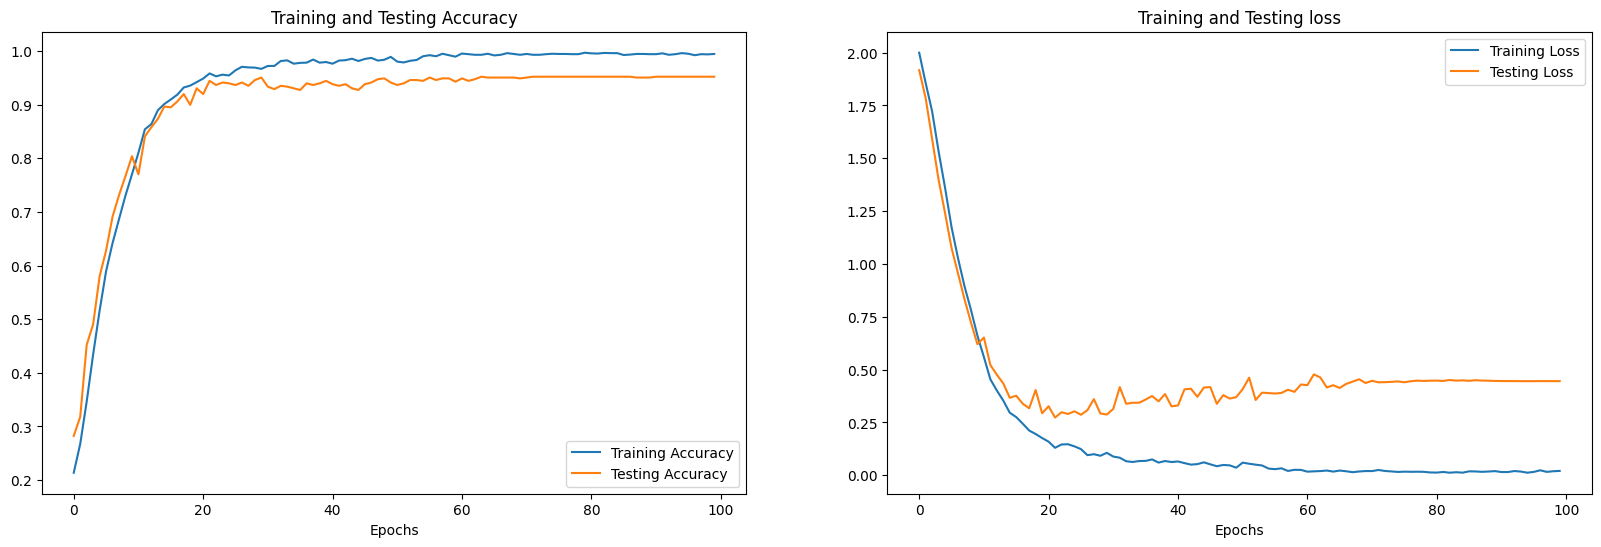

In [ ]:
# ## ploting the result
print("Accuracy of model on test data :" , model.evaluate(X_test, Y_test)[1]*100, "%")
fig, ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss= history.history['loss']
test_acc = history.history['val_accuracy']
test_loss= history.history['val_loss']


fig.set_size_inches(20,6)
ax[0].plot(train_acc, label = 'Training Accuracy')
ax[0].plot(test_acc, label = 'Testing Accuracy')
ax[0].set_title('Training and Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")

fig.set_size_inches(20,6)
ax[1].plot(train_loss, label = 'Training Loss')
ax[1].plot(test_loss, label = 'Testing Loss')
ax[1].set_title('Training and Testing loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()